# Генерация дополнительных строковых фичей.

## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL-записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

### Построение признаков из строк

1. Загрузим датасет из `data/vehicles_dataset_upd6.csv`, выведем первые 5 записей.

In [2]:
df = pd.read_csv('data/vehicles_dataset_upd6.csv')
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,is_jeep,is_honda,is_nissan,x0_diesel,x0_electric,x0_gas,x0_hybrid,x0_other,std_scaled_odometer,std_scaled_price
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0,0,0,1.0,0.0,0.0,0.0,0.0,-1.079390,2.958509
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0,0,0,0.0,0.0,0.0,0.0,1.0,-0.560115,-0.085826
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0,0,0,0.0,0.0,1.0,0.0,0.0,-1.292863,1.406256
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.352621,-0.281218
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0,0,0,0.0,0.0,0.0,0.0,1.0,-0.234311,-0.274017


In [3]:
df.shape

(9619, 45)

Выведем список значений и количество уникальных значений для модели автомобиля.

In [4]:
df.model.unique()

array(['2500 crew cab big horn', 'explorer 4wd 4dr xlt',
       'golf r hatchback', ..., 'gs350', '1988 Nisan',
       'a3 2.0t premium plus pzev'], dtype=object)

In [5]:
df.model[2].split(' ')

['golf', 'r', 'hatchback']

In [6]:
len(df.model.unique())

3341

In [9]:
df.model.nunique()

3341

Количество уникальных значений велико. Попробуем их сократить, оставив только первое слово в наименовании модели. С помощью lambda-функции и преобразования над строками создайте новый признак short_model, содержащий только первое слово из наименования модели, выведите его и количество получившихся уникальных значений.

In [8]:
df['short_model'] = df.model.apply(lambda x: x.split(' ')[0])
df['short_model']

0           2500
1       explorer
2           golf
3           rav4
4              1
          ...   
9614        rav4
9615    wrangler
9616          a3
9617     cayenne
9618        1500
Name: short_model, Length: 9619, dtype: object

In [10]:
df.short_model.nunique()

943

### Преобразование категориальных переменных

1. Для категориальных переменных `short_model`, `transmission`, `region`, `manufacturer`, `state`, `title_status`, `age_category` распечатаем наименование категории и количество уникальных значений в ней.

In [11]:
df.age_category.unique()

array(['new', 'average', 'old'], dtype=object)

In [16]:
df[['transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category']].nunique()

transmission      3
region          393
manufacturer     40
state            51
title_status      6
age_category      3
dtype: int64

Создадим датафрейм `data`, содержащий только выбранные категориальные переменные.

In [14]:
data2 = pd.DataFrame()

In [17]:
data2 = df[['transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category']]
data2.head(5)

,transmission,region,manufacturer,state,title_status,age_category
0,other,chattanooga,ram,tn,clean,new
1,automatic,north jersey,ford,nj,clean,new
2,other,reno / tahoe,volkswagen,ca,clean,new
3,automatic,fayetteville,toyota,nc,clean,average
4,other,knoxville,bmw,tn,clean,average


Создим объект класса OneHotEncoder, который будет отвечать за преобразование. Уточним, что на выходе должна быть неразреженная матрица.

In [21]:
8*16

128

In [18]:
ohe = OneHotEncoder(sparse=False)
ohe

OneHotEncoder(sparse=False)

Идентифицируем параметры преобразования на датафрейме с категориальными переменными.

In [20]:
print(len(data2.manufacturer.unique()))
print(len(data2.manufacturer))

40
9619


In [22]:
ohe.fit(data2[['transmission','region','manufacturer','state','title_status','age_category']])

OneHotEncoder(sparse=False)

Применим преобразование для датафрейма с категориальными переменными и сохраните в новую переменную, распечатаем получившуюся матрицу и её размерность.

In [23]:
ohe_model = ohe.transform(data2[[ 'transmission','region','manufacturer','state','title_status','age_category']])
ohe_model

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

Выведем новые наименования признаков с помощью метода get_feature_names_out

In [24]:
(ohe.inverse_transform(ohe_model))

array([['other', 'chattanooga', 'ram', 'tn', 'clean', 'new'],
       ['automatic', 'north jersey', 'ford', 'nj', 'clean', 'new'],
       ['other', 'reno / tahoe', 'volkswagen', 'ca', 'clean', 'new'],
       ...,
       ['automatic', 'salem', 'audi', 'or', 'clean', 'average'],
       ['automatic', 'madison', 'porsche', 'wi', 'clean', 'new'],
       ['other', 'norfolk / hampton roads', 'ram', 'va', 'clean', 'new']],
      dtype=object)

In [26]:
len(ohe.get_feature_names())

496

In [25]:
ohe.get_feature_names()

array(['x0_automatic', 'x0_manual', 'x0_other', 'x1_SF bay area',
       'x1_abilene', 'x1_akron / canton', 'x1_albany', 'x1_albuquerque',
       'x1_altoona-johnstown', 'x1_amarillo', 'x1_ames',
       'x1_anchorage / mat-su', 'x1_ann arbor', 'x1_annapolis',
       'x1_appleton-oshkosh-FDL', 'x1_asheville', 'x1_ashtabula',
       'x1_athens', 'x1_atlanta', 'x1_auburn', 'x1_augusta', 'x1_austin',
       'x1_bakersfield', 'x1_baltimore', 'x1_baton rouge',
       'x1_battle creek', 'x1_beaumont / port arthur', 'x1_bellingham',
       'x1_bemidji', 'x1_bend', 'x1_billings', 'x1_binghamton',
       'x1_birmingham', 'x1_bismarck', 'x1_bloomington',
       'x1_bloomington-normal', 'x1_boise', 'x1_boone', 'x1_boston',
       'x1_boulder', 'x1_bowling green', 'x1_bozeman', 'x1_brainerd',
       'x1_brownsville', 'x1_brunswick', 'x1_buffalo', 'x1_butte',
       'x1_cape cod / islands', 'x1_catskills', 'x1_cedar rapids',
       'x1_central NJ', 'x1_central louisiana', 'x1_central michigan',
    

Добавим в исходный датафрейм получившиеся новые признаки, выведите первые 5 записей датафрейма и список колонок

In [27]:
data2[ohe.get_feature_names()] = ohe_model
data2.head(5)

C:\Users\STUDENT\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\STUDENT\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:3673: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


,transmission,region,manufacturer,state,title_status,age_category,x0_automatic,x0_manual,x0_other,x1_SF bay area,...,x3_wy,x4_clean,x4_lien,x4_missing,x4_parts only,x4_rebuilt,x4_salvage,x5_average,x5_new,x5_old
0,other,chattanooga,ram,tn,clean,new,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,automatic,north jersey,ford,nj,clean,new,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,other,reno / tahoe,volkswagen,ca,clean,new,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,automatic,fayetteville,toyota,nc,clean,average,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,other,knoxville,bmw,tn,clean,average,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Посмотрим на результат обратного преобразования получившейся матрицы в исходные признаки, используем inverse_transform.

In [28]:
ohe.inverse_transform(ohe_model)

array([['other', 'chattanooga', 'ram', 'tn', 'clean', 'new'],
       ['automatic', 'north jersey', 'ford', 'nj', 'clean', 'new'],
       ['other', 'reno / tahoe', 'volkswagen', 'ca', 'clean', 'new'],
       ...,
       ['automatic', 'salem', 'audi', 'or', 'clean', 'average'],
       ['automatic', 'madison', 'porsche', 'wi', 'clean', 'new'],
       ['other', 'norfolk / hampton roads', 'ram', 'va', 'clean', 'new']],
      dtype=object)

### Стандартизация данных

1. Создадим переменную под количественные переменные `lat`, `long`, `year`, `odometer/price`, `desc_len`, `model_in_desc`, `model_len`, `model_word_count` и создадим датафрейм `data`, содержащий только выбранные количественные переменные.

In [29]:
data1 = df[['lat', 'long', 'year']]
data1.head(5)

,lat,long,year
0,35.060000,-85.250000,2020
1,40.821805,-74.061962,2016
2,33.779214,-84.411811,2017
3,35.715954,-78.655304,2013
4,35.970000,-83.940000,2012


In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
data1['odometer/price'] = df['odometer'] / df['price']
data1['odometer/price'].head(5)

0    0.499036
1    3.542852
2    0.394718
3    8.089034
4    5.515079
Name: odometer/price, dtype: float64

In [32]:
data1['desc_len'] = df.description.apply(lambda x: len(x))
data1.head(5)

,lat,long,year,odometer/price,desc_len
0,35.060000,-85.250000,2020,0.499036,4482
1,40.821805,-74.061962,2016,3.542852,968
2,33.779214,-84.411811,2017,0.394718,4286
3,35.715954,-78.655304,2013,8.089034,3241
4,35.970000,-83.940000,2012,5.515079,4851


In [33]:
data1['model_in_desc'] = df.apply(lambda x: x.description.count(x.model) , axis=1)
data1.head(5)

,lat,long,year,odometer/price,desc_len,model_in_desc
0,35.060000,-85.250000,2020,0.499036,4482,0
1,40.821805,-74.061962,2016,3.542852,968,0
2,33.779214,-84.411811,2017,0.394718,4286,0
3,35.715954,-78.655304,2013,8.089034,3241,0
4,35.970000,-83.940000,2012,5.515079,4851,0


In [34]:
data1['model_len'] = df.model.apply(lambda x: len(x))
data1.head(5)

,lat,long,year,odometer/price,desc_len,model_in_desc,model_len
0,35.060000,-85.250000,2020,0.499036,4482,0,22
1,40.821805,-74.061962,2016,3.542852,968,0,20
2,33.779214,-84.411811,2017,0.394718,4286,0,16
3,35.715954,-78.655304,2013,8.089034,3241,0,4
4,35.970000,-83.940000,2012,5.515079,4851,0,22


In [35]:
data1['model_word_count'] = df.model.apply(lambda x: x.split(' ')).apply(lambda x: len(x))
data1

,lat,long,year,odometer/price,desc_len,model_in_desc,model_len,model_word_count
0,35.060000,-85.250000,2020,0.499036,4482,0,22,5
1,40.821805,-74.061962,2016,3.542852,968,0,20,4
2,33.779214,-84.411811,2017,0.394718,4286,0,16,3
3,35.715954,-78.655304,2013,8.089034,3241,0,4,1
4,35.970000,-83.940000,2012,5.515079,4851,0,22,5
...,...,...,...,...,...,...,...,...
9614,42.123900,-79.189500,2002,33.370412,1710,0,4,1
9615,43.216990,-77.755610,2008,7.835323,948,0,8,1
9616,44.925908,-122.982753,2011,16.696387,909,0,25,5
9617,43.029559,-89.397796,2015,1.941787,3644,0,7,1


Многие алгоритмы машинного обучения работают лучше или сходятся быстрее, когда функции находятся в относительно одинаковом масштабе и / или близки к нормальному распределению. Примеры таких семейств алгоритмов включают в себя:

- линейная и логистическая регрессия
- ближайшие соседи
- нейронные сети
- машины опорных векторов с функциями ядра с радиальным смещением
- анализ основных компонентов
- линейный дискриминантный анализ

Масштабирование и стандартизация могут помочь функциям получить более удобную форму для этих алгоритмов.

MinMaxScaler,RobustScaler,StandardScaler, а такжеNormalizerявляются методами предварительной обработки данных для машинного обучения.



#### Создадим объект `std_scaler` класса StandardScaler с параметрами по умолчанию, который будет отвечать за стандартизацию.

StandardScaler стандартизирует функцию путем вычитания среднего значения, а затем масштабирования до дисперсии единиц. Единица отклонения означает деление всех значений на стандартное отклонение. StandardScaler не соответствует строгому определениюмасштабЯ представил ранее.

StandardScaler приводит к распределению со стандартным отклонением, равным 1. Дисперсия также равна 1, поскольку дисперсия = стандартное отклонение в квадрате, И 1 в квадрате = 1.

StandardScaler составляет среднее значение распределения 0. Около 68% значений будут находиться в диапазоне от -1 до 1.

In [36]:
std_scaler = StandardScaler()
std_scaler

StandardScaler()

Идентифицируем параметры преобразования на датафрейме с количественными переменными.

In [37]:
std_scaler.fit(df[['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc', 'model_len', 'model_word_count']])

StandardScaler()

Применим преобразование для датафрейма с количественными переменными и сохраним в новую переменную, распечатаем получившуюся матрицу и её размерность.

In [38]:
std_scaled = std_scaler.transform(df[['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc', 'model_len', 'model_word_count']])
std_scaled

array([[-0.61917248,  0.48424452,  1.32239376, ..., -0.15578836,
         1.16303238,  1.91066901],
       [ 0.38801429,  1.11079989,  0.69597272, ..., -0.15578836,
         0.93208734,  1.23579936],
       [-0.84305905,  0.531185  ,  0.85257798, ..., -0.15578836,
         0.47019727,  0.56092971],
       ...,
       [ 1.10542805, -1.62887477, -0.08705357, ..., -0.15578836,
         1.50944993,  1.91066901],
       [ 0.7739386 ,  0.25195859,  0.53936746, ..., -0.15578836,
        -0.56905538, -0.78880959],
       [-0.33773799,  0.98546471,  0.85257798, ..., -0.15578836,
         1.16303238,  1.91066901]])

In [39]:
std_scaled.shape

(9619, 8)

In [40]:
data1[['std_scaled_lat', 'std_scaled_long', 'std_scaled_year', 'std_scaled_odometer/price', 'std_scaled_desc_len', 'std_scaled_model_in_desc', 'std_scaled_model_len', 'std_scaled_model_word_count']] = std_scaled

In [41]:
data1

,lat,long,year,odometer/price,desc_len,model_in_desc,model_len,model_word_count,std_scaled_lat,std_scaled_long,std_scaled_year,std_scaled_odometer/price,std_scaled_desc_len,std_scaled_model_in_desc,std_scaled_model_len,std_scaled_model_word_count
0,35.060000,-85.250000,2020,0.499036,4482,0,22,5,-0.619172,0.484245,1.322394,-0.510784,0.632075,-0.155788,1.163032,1.910669
1,40.821805,-74.061962,2016,3.542852,968,0,20,4,0.388014,1.110800,0.695973,-0.402947,-0.646781,-0.155788,0.932087,1.235799
2,33.779214,-84.411811,2017,0.394718,4286,0,16,3,-0.843059,0.531185,0.852578,-0.514480,0.560744,-0.155788,0.470197,0.560930
3,35.715954,-78.655304,2013,8.089034,3241,0,4,1,-0.504509,0.853562,0.226157,-0.241883,0.180435,-0.155788,-0.915473,-0.788810
4,35.970000,-83.940000,2012,5.515079,4851,0,22,5,-0.460101,0.557607,0.069552,-0.333074,0.766366,-0.155788,1.163032,1.910669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9614,42.123900,-79.189500,2002,33.370412,1710,0,4,1,0.615626,0.823646,-1.496501,0.653795,-0.376744,-0.155788,-0.915473,-0.788810
9615,43.216990,-77.755610,2008,7.835323,948,0,8,1,0.806702,0.903947,-0.556869,-0.250872,-0.654060,-0.155788,-0.453583,-0.788810
9616,44.925908,-122.982753,2011,16.696387,909,0,25,5,1.105428,-1.628875,-0.087054,0.063061,-0.668253,-0.155788,1.509450,1.910669
9617,43.029559,-89.397796,2015,1.941787,3644,0,7,1,0.773939,0.251959,0.539367,-0.459670,0.327100,-0.155788,-0.569055,-0.788810


In [42]:
data1.shape

(9619, 16)

Добавим в исходный датафрейм получившиеся новые признаки, выведем первые 5 записей датафрейма и список колонок.

In [43]:
data1.head(5)

,lat,long,year,odometer/price,desc_len,model_in_desc,model_len,model_word_count,std_scaled_lat,std_scaled_long,std_scaled_year,std_scaled_odometer/price,std_scaled_desc_len,std_scaled_model_in_desc,std_scaled_model_len,std_scaled_model_word_count
0,35.060000,-85.250000,2020,0.499036,4482,0,22,5,-0.619172,0.484245,1.322394,-0.510784,0.632075,-0.155788,1.163032,1.910669
1,40.821805,-74.061962,2016,3.542852,968,0,20,4,0.388014,1.110800,0.695973,-0.402947,-0.646781,-0.155788,0.932087,1.235799
2,33.779214,-84.411811,2017,0.394718,4286,0,16,3,-0.843059,0.531185,0.852578,-0.514480,0.560744,-0.155788,0.470197,0.560930
3,35.715954,-78.655304,2013,8.089034,3241,0,4,1,-0.504509,0.853562,0.226157,-0.241883,0.180435,-0.155788,-0.915473,-0.788810
4,35.970000,-83.940000,2012,5.515079,4851,0,22,5,-0.460101,0.557607,0.069552,-0.333074,0.766366,-0.155788,1.163032,1.910669


In [44]:
data1.columns

Index(['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc',
       'model_len', 'model_word_count', 'std_scaled_lat', 'std_scaled_long',
       'std_scaled_year', 'std_scaled_odometer/price', 'std_scaled_desc_len',
       'std_scaled_model_in_desc', 'std_scaled_model_len',
       'std_scaled_model_word_count'],
      dtype='object')

### MinMax-нормализация данных

Импортируем MinMaxScaler из `sklearn.preprocessing`.

Для каждого значения в объекте MinMaxScaler вычитает минимальное значение в объекте и затем делит на диапазон. Диапазон - это разница между исходным максимумом и исходным минимумом.

MinMaxScaler сохраняет форму исходного дистрибутива. Это не приводит к значительному изменению информации, встроенной в исходные данные.

Обратите внимание, что MinMaxScaler не уменьшает важность выбросов.

Диапазон по умолчанию для функции, возвращаемой MinMaxScaler, составляет от 0 до 1

In [45]:
from sklearn.preprocessing import MinMaxScaler

Создайте датафрейм, содержащий переменные `lat` и `long`.

In [46]:
data_new = df[['lat', 'long']]
data_new.head(7)

,lat,long
0,35.060000,-85.250000
1,40.821805,-74.061962
2,33.779214,-84.411811
3,35.715954,-78.655304
4,35.970000,-83.940000
5,41.373000,-93.735800
6,37.302900,-79.932200


Повторим действия пунктов 2–6 из задачи 3 для добавления в исходный датафрейм признаков `lat_mm` и `long_mm`. Выведем получившийся датафрейм.

In [47]:
min_max_scaler = MinMaxScaler()
min_max_scaler

MinMaxScaler()

In [48]:
min_max_scaler.fit(data_new[['lat', 'long']])

MinMaxScaler()

In [49]:
min_max_scaler = min_max_scaler.transform(data_new[['lat', 'long']])
min_max_scaler

array([[0.34176874, 0.28869912],
       [0.4686646 , 0.33305517],
       [0.31356118, 0.2920222 ],
       ...,
       [0.55905185, 0.13910399],
       [0.51728736, 0.27225478],
       [0.37722678, 0.32418225]])

In [50]:
data_new[['lat.mm', 'long.mm']] = min_max_scaler

In [51]:
data_new.head(7)

,lat,long,lat.mm,long.mm
0,35.060000,-85.250000,0.341769,0.288699
1,40.821805,-74.061962,0.468665,0.333055
2,33.779214,-84.411811,0.313561,0.292022
3,35.715954,-78.655304,0.356215,0.314844
4,35.970000,-83.940000,0.361810,0.293893
5,41.373000,-93.735800,0.480804,0.255056
6,37.302900,-79.932200,0.391166,0.309782


Создададим переменную под географические признаки `lat`, `lat_std`, `lat_mm`, `long`, `long_std`, `long_mm` и выведите их. Посмотрим на различия в значениях для исходных признаков и нормализованных с помощью стандартизации и MinMax-преобразования. 

In [52]:
data_geografic = data_new[['lat', 'long', 'lat.mm', 'long.mm']]

In [53]:
data_geografic['lat_std'] = data1['std_scaled_lat']
data_geografic['long_std'] = data1['std_scaled_long']

In [54]:
data_geografic

,lat,long,lat.mm,long.mm,lat_std,long_std
0,35.060000,-85.250000,0.341769,0.288699,-0.619172,0.484245
1,40.821805,-74.061962,0.468665,0.333055,0.388014,1.110800
2,33.779214,-84.411811,0.313561,0.292022,-0.843059,0.531185
3,35.715954,-78.655304,0.356215,0.314844,-0.504509,0.853562
4,35.970000,-83.940000,0.361810,0.293893,-0.460101,0.557607
...,...,...,...,...,...,...
9614,42.123900,-79.189500,0.497341,0.312727,0.615626,0.823646
9615,43.216990,-77.755610,0.521415,0.318411,0.806702,0.903947
9616,44.925908,-122.982753,0.559052,0.139104,1.105428,-1.628875
9617,43.029559,-89.397796,0.517287,0.272255,0.773939,0.251959


Выведем описательные статистики для всех географических признаков. Посмотрим на различия в статистиках для исходных признаков и нормализованных с помощью стандартизации и MinMax-преобразования.

In [55]:
data_geografic.describe()

,lat,long,lat.mm,long.mm,lat_std,long_std
count,9619.000000,9619.000000,9619.000000,9619.000000,9.619000e+03,9.619000e+03
mean,38.602095,-93.896875,0.419779,0.254418,2.108662e-16,-4.267993e-16
std,5.720989,17.857352,0.125997,0.070797,1.000052e+00,1.000052e+00
min,19.541726,-158.069300,0.000000,0.000000,-3.331829e+00,-3.593801e+00
25%,34.920000,-106.944340,0.338685,0.202690,-6.436450e-01,-7.306875e-01
50%,39.300000,-87.845800,0.435149,0.278408,1.219966e-01,3.388739e-01
75%,42.382100,-80.678711,0.503028,0.306822,6.607601e-01,7.402470e-01
max,64.947500,94.163200,1.000000,1.000000,4.605283e+00,1.053179e+01


Выведем матрицу корреляций для всех географических признаков, чтобы убедиться, что нормализация признаков сохранила свойства исходных признаков.

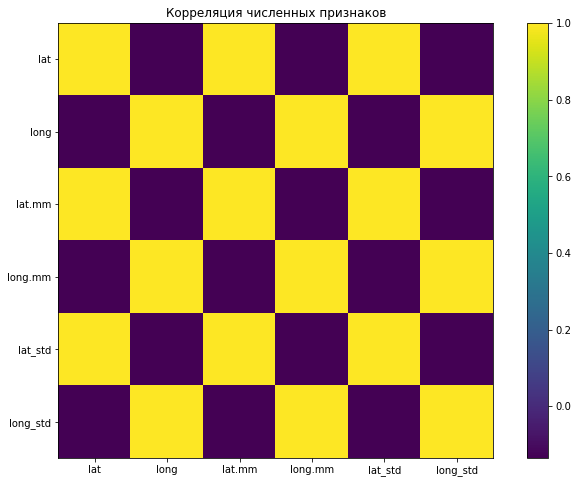

In [56]:
plt.figure(figsize=(12, 8))

columns = data_geografic.corr().columns.tolist()
plt.imshow(data_geografic.corr())

plt.title("Корреляция численных признаков")
plt.xticks(range(0, len(columns)), columns)
plt.yticks(range(0, len(columns)), columns)
plt.colorbar()
plt.show()

#### RobustScaler

RobustScalerпреобразует вектор признаков путем вычитания медианы, а затем деления на диапазон между четвертями (значение 75% - значение 25%).

Обратите внимание, что RobustScaler не масштабирует данные в заранее определенный интервал, как MinMaxScaler. Диапазон для каждой функции после применения RobustScaler больше, чем для MinMaxScaler.

Используйте RobustScaler, если вы хотите уменьшить влияние выбросов по сравнению с MinMaxScaler.

#### Normalizer

Нормализатор преобразует все функции в значения от -1 до 1 
Normalizerработает над строками, а не над столбцами! 

По умолчанию нормализация L2 применяется к каждому наблюдению, так что значения в строке имеют единичную норму.Единица нормыс L2 означает, что если бы каждый элемент был возведен в квадрат и суммирован, сумма была бы равна 1.

## Шпаргалки!

- Используйте MinMaxScaler по умолчанию, если вы преобразовываете функцию. Это не искажает.

- Вы можете использовать RobustScaler, если у вас есть выбросы и вы хотите уменьшить их влияние. Тем не менее, вам лучше удалить выбросы.

- Используйте StandardScaler, если вам нужен относительно нормальный дистрибутив.

- Используйте Normalizer экономно - он нормализует строки выборки, а не столбцы объектов. Он может использовать нормализацию l2 или l1.

<img src="pic1.png"></img>

### Признаки на основе дат

Выведем по отдельности колонки `posting_date` и `date`. 

In [57]:
df.date

0       2021-04-17 16:30:50+00:00
1       2021-05-03 19:40:21+00:00
2       2021-04-28 10:52:20+00:00
3       2021-04-17 14:08:57+00:00
4       2021-04-08 19:10:56+00:00
                  ...            
9614    2021-04-10 20:33:57+00:00
9615    2021-05-03 13:36:30+00:00
9616    2021-04-22 19:14:01+00:00
9617    2021-04-14 14:14:42+00:00
9618    2021-04-24 17:50:49+00:00
Name: date, Length: 9619, dtype: object

In [58]:
df[['posting_date', 'date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9619 entries, 0 to 9618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   posting_date  9619 non-null   object
 1   date          9619 non-null   object
dtypes: object(2)
memory usage: 150.4+ KB


In [62]:
data[['data']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9619 entries, 0 to 9618
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   data    9619 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 75.3 KB


Ранее преобразованная колонка `date` после сохранения в файл и загрузки из него содержит данные в строковом формате, поэтому изменим её тип c помощью `pd.to_datetime`.

In [59]:
data = pd.DataFrame()
data['data'] = pd.to_datetime(df['date'])
data

,data
0,2021-04-17 16:30:50+00:00
1,2021-05-03 19:40:21+00:00
2,2021-04-28 10:52:20+00:00
3,2021-04-17 14:08:57+00:00
4,2021-04-08 19:10:56+00:00
...,...
9614,2021-04-10 20:33:57+00:00
9615,2021-05-03 13:36:30+00:00
9616,2021-04-22 19:14:01+00:00
9617,2021-04-14 14:14:42+00:00


Извлечем номер месяца продажи автомобиля

In [63]:
data['month'] = df['posting_date'].apply(lambda x: x[5:7])

In [64]:
data['data'].apply(lambda x: x.month)

0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: data, Length: 9619, dtype: int64

In [65]:
data['data'].dt.month

0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: data, Length: 9619, dtype: int64

Давайте придумаем еще пару методов!

Создадим признак `dayofweek`, обозначающий день недели размещения объявления о продаже автомобиля

In [66]:
data['dayofweek'] = data['data'].dt.weekday
data['dayofweek']

0       5
1       0
2       2
3       5
4       3
       ..
9614    5
9615    0
9616    3
9617    2
9618    5
Name: dayofweek, Length: 9619, dtype: int64

Создадим признак `diff_years`, обозначающий количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля

In [67]:
data['diff_years'] = df[['year']].apply(lambda x: data['data'].dt.year - x)
data['diff_years']

0        1
1        5
2        4
3        8
4        9
        ..
9614    19
9615    13
9616    10
9617     6
9618     4
Name: diff_years, Length: 9619, dtype: int64

Применим стандартизацию к новым признаками и сохраним результат в новые признаки вида month_std.

In [68]:
std_scaler = StandardScaler()

std_scaler.fit(data[['month', 'dayofweek', 'diff_years']])
std_scaled = std_scaler.transform(data[['month', 'dayofweek', 'diff_years']])

print(std_scaled.shape)

data[['month_std', 'dayofweek_std', 'diff_years_std']] = std_scaled

(9619, 3)


In [69]:
data.head(5)

,data,month,dayofweek,diff_years,month_std,dayofweek_std,diff_years_std
0,2021-04-17 16:30:50+00:00,04,5,1,-0.599647,1.120284,-1.322394
1,2021-05-03 19:40:21+00:00,05,0,5,1.667649,-1.374972,-0.695973
2,2021-04-28 10:52:20+00:00,04,2,4,-0.599647,-0.376870,-0.852578
3,2021-04-17 14:08:57+00:00,04,5,8,-0.599647,1.120284,-0.226157
4,2021-04-08 19:10:56+00:00,04,3,9,-0.599647,0.122182,-0.069552
